# Data Cleaning & Transformation of 'Data Science Job Posting on Glassdoor' dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

## Library Imports

In [2]:
# Import libraries
import re
from datetime import datetime

## Data Exploratory

In [3]:
# Read the dataset
df = pd.read_csv('Uncleaned_DS_jobs.csv', index_col = 'index')

In [4]:
# Quick view of the dataset
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [5]:
# View dataset shape
df.shape

(672, 14)

In [6]:
# Column list
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [7]:
# Describe the dataset
stats = df.describe(include='all')
print(stats)

             Job Title              Salary Estimate  \
count              672                          672   
unique             172                           30   
top     Data Scientist  $79K-$131K (Glassdoor est.)   
freq               337                           32   
mean               NaN                          NaN   
std                NaN                          NaN   
min                NaN                          NaN   
25%                NaN                          NaN   
50%                NaN                          NaN   
75%                NaN                          NaN   
max                NaN                          NaN   

                                          Job Description      Rating  \
count                                                 672  672.000000   
unique                                                489         NaN   
top     Job Overview: The Data Scientist is a key memb...         NaN   
freq                                           

In [8]:
# List column types
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

Number of missing values for each column:
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


<Axes: ylabel='index'>

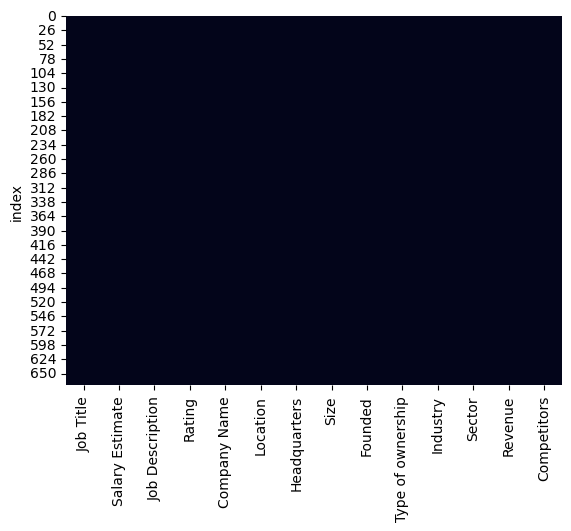

In [9]:
# Detect missing values in each column
print("Number of missing values for each column:")
print(df.isna().sum())
sns.heatmap(df.isnull(), cbar=False)  # Visualize missing data

In [10]:
# Check duplicate rows
print('Number of duplicated rows: ',df.duplicated().sum())
      
# Drop duplicated rows
print('Dropping duplicates...')
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

print('Dataframe shape: ',df.shape)

Number of duplicated rows:  13
Dropping duplicates...
Dataframe shape:  (659, 14)


## Data Preparation and Cleaning

#### 'Job Title' Colum

In [11]:
# List unique values
sorted(df['Job Title'].unique())

['(Sr.) Data Scientist -',
 'AI Data Scientist',
 'AI Ops Data Scientist',
 'AI/ML - Machine Learning Scientist, Siri Understanding',
 'Analytics - Business Assurance Data Analyst',
 'Analytics Manager',
 'Analytics Manager - Data Mart',
 'Applied AI Scientist / Engineer',
 'Applied Computer Scientist',
 'Applied Technology Researcher / Data Scientist',
 'Associate Data Scientist',
 'Aviation AI/ML Data Scientist',
 'Big Data Engineer',
 'Business Data Analyst',
 'Business Intelligence Analyst',
 'Business Intelligence Analyst I- Data Insights',
 'COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING',
 'COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPUTER SCIENTIST - TRANSPORTATION TECHNOLOGY',
 'Chief Scientist',
 'Clinical Data Analyst',
 'Cloud Data Engineer (Azure)',
 'Computational Behavioral Scientist',
 'Computational Scientist',
 'Computational Scientist, Machine Learning',
 'Computer Scientist 1',
 'Computer Vision / Deep Learning Scientist',
 'Data & M

**Note: Job Title column seems fine, and there is no missing values. Conclusion: the column is ready.**

#### 'Salary Estimate' Column

In [12]:
# List unique values
sorted(df['Salary Estimate'].unique())

['$101K-$165K (Glassdoor est.)',
 '$105K-$167K (Glassdoor est.)',
 '$110K-$163K (Glassdoor est.)',
 '$112K-$116K (Glassdoor est.)',
 '$122K-$146K (Glassdoor est.)',
 '$124K-$198K (Glassdoor est.)',
 '$128K-$201K (Glassdoor est.)',
 '$137K-$171K (Glassdoor est.)',
 '$138K-$158K (Glassdoor est.)',
 '$141K-$225K (Glassdoor est.)',
 '$145K-$225K(Employer est.)',
 '$212K-$331K (Glassdoor est.)',
 '$31K-$56K (Glassdoor est.)',
 '$56K-$97K (Glassdoor est.)',
 '$66K-$112K (Glassdoor est.)',
 '$69K-$116K (Glassdoor est.)',
 '$71K-$123K (Glassdoor est.)',
 '$75K-$131K (Glassdoor est.)',
 '$79K-$106K (Glassdoor est.)',
 '$79K-$131K (Glassdoor est.)',
 '$79K-$133K (Glassdoor est.)',
 '$79K-$147K (Glassdoor est.)',
 '$80K-$132K (Glassdoor est.)',
 '$87K-$141K (Glassdoor est.)',
 '$90K-$109K (Glassdoor est.)',
 '$90K-$124K (Glassdoor est.)',
 '$91K-$150K (Glassdoor est.)',
 '$92K-$155K (Glassdoor est.)',
 '$95K-$119K (Glassdoor est.)',
 '$99K-$132K (Glassdoor est.)']

In [13]:
# Remove unnecessary part
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda val:val.replace('(Employer est.)','').replace('(Glassdoor est.)','').replace('$','').strip())
sorted(df['Salary Estimate'].unique())


['101K-165K',
 '105K-167K',
 '110K-163K',
 '112K-116K',
 '122K-146K',
 '124K-198K',
 '128K-201K',
 '137K-171K',
 '138K-158K',
 '141K-225K',
 '145K-225K',
 '212K-331K',
 '31K-56K',
 '56K-97K',
 '66K-112K',
 '69K-116K',
 '71K-123K',
 '75K-131K',
 '79K-106K',
 '79K-131K',
 '79K-133K',
 '79K-147K',
 '80K-132K',
 '87K-141K',
 '90K-109K',
 '90K-124K',
 '91K-150K',
 '92K-155K',
 '95K-119K',
 '99K-132K']

In [14]:
# Remove the letter K and multiply by 1000
def salary_estimate_transform(value):
    data = value.replace('K','')
    vals = data.split('-')
    transformed_vals = [str(int(val)*1000) for val in vals]
    return '-'.join(transformed_vals)

df['Salary Estimate'] = df['Salary Estimate'].apply(salary_estimate_transform)

sorted(df['Salary Estimate'].unique())

['101000-165000',
 '105000-167000',
 '110000-163000',
 '112000-116000',
 '122000-146000',
 '124000-198000',
 '128000-201000',
 '137000-171000',
 '138000-158000',
 '141000-225000',
 '145000-225000',
 '212000-331000',
 '31000-56000',
 '56000-97000',
 '66000-112000',
 '69000-116000',
 '71000-123000',
 '75000-131000',
 '79000-106000',
 '79000-131000',
 '79000-133000',
 '79000-147000',
 '80000-132000',
 '87000-141000',
 '90000-109000',
 '90000-124000',
 '91000-150000',
 '92000-155000',
 '95000-119000',
 '99000-132000']

In [15]:
# Separate Salary Estimate into Salary Estimate Lower Bound and Salary Estimate Higher Bound for future calculation
def salary_estimate_lower(val):
    vals = val.split('-')
    return int(vals[0])

def salary_estimate_higher(val):
    vals = val.split('-')
    return int(vals[1])

df['Salary Estimate Lower Bound'] = df['Salary Estimate'].apply(salary_estimate_lower)

df['Salary Estimate Higher Bound'] = df['Salary Estimate'].apply(salary_estimate_higher)

df[['Salary Estimate','Salary Estimate Lower Bound','Salary Estimate Higher Bound']].head(5)

,Salary Estimate,Salary Estimate Lower Bound,Salary Estimate Higher Bound
0,137000-171000,137000,171000
1,137000-171000,137000,171000
2,137000-171000,137000,171000
3,137000-171000,137000,171000
4,137000-171000,137000,171000


#### 'Job Description' Column

In [16]:
# View a sample of Job Description
df['Job Description'][1]

"Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous\n\nThe successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.\n\nDuties, Tasks & Responsibilities\nWorking with large, complex, and disparate data sets\nDesigning and implementing innovative ways to analyze and exploit the Sponsors data holdings\nResearching and report

**Note: Need to remove the \n character**

In [17]:
# Remove '\n' and strip any heading or trailing spaces.
df['Job Description'] = df['Job Description'].str.replace('\n', ' ')
df['Job Description'] = df['Job Description'].str.strip()

df['Job Description'][1]

"Secure our Nation, Ignite your Future  Join the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous  The successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.  Duties, Tasks & Responsibilities Working with large, complex, and disparate data sets Designing and implementing innovative ways to analyze and exploit the Sponsors data holdings Researching and reporting on a 

#### 'Rating' Column

In [18]:
# View unique value list
sorted(df['Rating'].unique())

[-1.0,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0]

**Note: Some values have invalid value of -1.**

In [19]:
# Transform value to complete form
df['Rating'] = np.where(df['Rating'] == -1.0,0,df['Rating'])

sorted(df['Rating'].unique())

[0.0,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0]

#### 'Company Name' Column

In [20]:
# View Company Name samples
df['Company Name'].head(5)

0           Healthfirst\n3.1
1               ManTech\n4.2
2        Analysis Group\n3.8
3               INFICON\n3.5
4    Affinity Solutions\n2.9
Name: Company Name, dtype: object

**Note: Need to remove \n character and the rating**

In [21]:
# Remove unnecessary part
df['Company Name'] = df['Company Name'].replace(r'\n\d\.\d', '', regex=True)
df['Company Name'].head(5)

0           Healthfirst
1               ManTech
2        Analysis Group
3               INFICON
4    Affinity Solutions
Name: Company Name, dtype: object

#### 'Location' Column

In [22]:
# View samples
sorted(df['Location'].unique())

['Adelphi, MD',
 'Akron, OH',
 'Alexandria, VA',
 'Alpharetta, GA',
 'Ann Arbor, MI',
 'Annapolis Junction, MD',
 'Appleton, WI',
 'Arlington, VA',
 'Ashburn, VA',
 'Atlanta, GA',
 'Aurora, CO',
 'Austin, TX',
 'Baltimore, MD',
 'Beavercreek, OH',
 'Bedford, MA',
 'Bellevue, WA',
 'Bethesda, MD',
 'Birmingham, AL',
 'Blue Bell, PA',
 'Boston, MA',
 'Bothell, WA',
 'Boulder, CO',
 'Bridgeport, WV',
 'Brisbane, CA',
 'Brooklyn, NY',
 'Burbank, CA',
 'Burlingame, CA',
 'California',
 'Cambridge, MA',
 'Carmel, IN',
 'Carpinteria, CA',
 'Carson, CA',
 'Cedar Rapids, IA',
 'Champaign, IL',
 'Chandler, AZ',
 'Chantilly, VA',
 'Charlotte, NC',
 'Chicago, IL',
 'Cincinnati, OH',
 'Cleveland, OH',
 'Collegeville, PA',
 'Colorado Springs, CO',
 'Columbia, MD',
 'Columbia, MO',
 'Columbia, SC',
 'Concord, CA',
 'Coral Gables, FL',
 'Culver City, CA',
 'Cupertino, CA',
 'Dallas, TX',
 'Danvers, MA',
 'Dayton, OH',
 'Dearborn, MI',
 'Denver, CO',
 'Durham, NC',
 'Edison, NJ',
 'Emeryville, CA',
 'E

**Note: We might need to split the city and state into 2 separate columns for better aggregations later**

In [23]:
# Extract Location into City and State
df[['City', 'State']] = df['Location'].str.extract(r'^(.*?),\s*([A-Z]{2})$')

df[['Location','City','State']].head(5)

,Location,City,State
0,"New York, NY",New York,NY
1,"Chantilly, VA",Chantilly,VA
2,"Boston, MA",Boston,MA
3,"Newton, MA",Newton,MA
4,"New York, NY",New York,NY


In [24]:
# Drop column Location
df.drop(columns=['Location'], inplace=True)

#### 'Headquarters' Column

In [25]:
# View samples
sorted(df['Headquarters'].unique())

['-1',
 'Akron, OH',
 'Albertville, AL',
 'Albuquerque, NM',
 'Alexandria, VA',
 'Aliso Viejo, CA',
 'Alpharetta, GA',
 'Annapolis Junction, MD',
 'Arlington, VA',
 'Armonk, NY',
 'Ashburn, VA',
 'Atlanta, GA',
 'Aurora, CO',
 'Aurora, Canada',
 'Austin, TX',
 'Bad Ragaz, Switzerland',
 'Baltimore, MD',
 'Bangalore, India',
 'Basel, Switzerland',
 'Beavercreek, OH',
 'Bedford, MA',
 'Bellevue, WA',
 'Beltsville, MD',
 'Bengaluru, India',
 'Benicia, CA',
 'Bethesda, MD',
 'Birmingham, AL',
 'Blue Bell, PA',
 'Boston, MA',
 'Brentford, United Kingdom',
 'Brisbane, CA',
 'Bristol, PA',
 'Burlingame, CA',
 'Cambridge, MA',
 'Cambridge, United Kingdom',
 'Carle Place, NY',
 'Carmel, IN',
 'Carpinteria, CA',
 'Carson, CA',
 'Cedar Rapids, IA',
 'Chadds Ford, PA',
 'Chandler, AZ',
 'Chantilly, VA',
 'Charlotte, NC',
 'Chennai, India',
 'Cherry Hill, NJ',
 'Chevy Chase, MD',
 'Chicago, IL',
 'Cincinnati, OH',
 'Cleveland, OH',
 'Clifton Park, NY',
 'Coconut Creek, FL',
 'Columbia, MD',
 'Colum

**Note: There are City and State in the USA and there are City and foreign countries. Maybe we have 3 columns called Headquarter City, Headquarter State and Headquarter Country.**

In [26]:
# Split the data into City and State
df[['Headquarter City', 'Headquarter State']] = df['Headquarters'].str.split(', ', expand=True)

df[['Headquarter City', 'Headquarter State']].head(5)

,Headquarter City,Headquarter State
0,New York,NY
1,Herndon,VA
2,Boston,MA
3,Bad Ragaz,Switzerland
4,New York,NY


In [27]:
# Create Headquarter Country column
df['Headquarter Country'] = df['Headquarter State'].apply(
    lambda x: 'United States' if re.search('^[A-Z]{2}$', str(x)) else x
)

df[['Headquarter City', 'Headquarter State', 'Headquarter Country']].head(5)

,Headquarter City,Headquarter State,Headquarter Country
0,New York,NY,United States
1,Herndon,VA,United States
2,Boston,MA,United States
3,Bad Ragaz,Switzerland,Switzerland
4,New York,NY,United States


In [28]:
# Remove those rows that have country as state
df['Headquarter State'] = df['Headquarter State'].apply(
    lambda x: pd.NA if not re.search('^[A-Z]{2}$', str(x)) else x
)

df[['Headquarter City', 'Headquarter State', 'Headquarter Country']].head(5)

,Headquarter City,Headquarter State,Headquarter Country
0,New York,NY,United States
1,Herndon,VA,United States
2,Boston,MA,United States
3,Bad Ragaz,<NA>,Switzerland
4,New York,NY,United States


#### 'Size' Column

In [29]:
# View unique values
sorted(df['Size'].unique())

['-1',
 '1 to 50 employees',
 '10000+ employees',
 '1001 to 5000 employees',
 '201 to 500 employees',
 '5001 to 10000 employees',
 '501 to 1000 employees',
 '51 to 200 employees',
 'Unknown']

**Note: There is unreasonable value of -1 and we need to simplify value (eg: from '1 to 50 employees' to '1-50'**

In [30]:
# Remove unneccessary part
df['Size'] = df['Size'].str.replace(' employees','')
df['Size'] = df['Size'].str.replace(' to ','-')

sorted(df['Size'].unique())


['-1',
 '1-50',
 '10000+',
 '1001-5000',
 '201-500',
 '5001-10000',
 '501-1000',
 '51-200',
 'Unknown']

#### 'Founded' Column

In [31]:
# View unique values
sorted(df['Founded'].unique())

[-1,
 1781,
 1788,
 1820,
 1830,
 1849,
 1850,
 1851,
 1853,
 1860,
 1863,
 1875,
 1880,
 1887,
 1894,
 1896,
 1898,
 1908,
 1911,
 1912,
 1913,
 1914,
 1917,
 1918,
 1925,
 1926,
 1929,
 1932,
 1933,
 1935,
 1937,
 1939,
 1942,
 1945,
 1946,
 1947,
 1948,
 1949,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1976,
 1977,
 1978,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

**Note: Founded year is not informative, create another column called 'Company Age'**

In [32]:
# Create 'Company Age' column
df['Company Age'] = np.where(df['Founded'] == -1, -1, datetime.now().year - df['Founded'])

df['Company Age'].unique()

array([ 31,  56,  43,  24,  26,  14,  28,  34,  41,  10,  12,   8,  59,
        51,  38,  27,   9,  79,  36,   7,  13,  57, 164,  32,  21,  73,
        19,   5,  99,  16,  25,  46,  58, 112,  66,  11, 175, 243,  98,
        18,  30, 161,  29,  -1,  42,  50,  23,  39, 111,  53, 113,  15,
        65,  17,  85,  22,  63,  61,  55,  78,  67,  71,  76, 174, 173,
        20,  48, 106,  70,  77,  69,   6,  87, 107,  89,  95, 204,  72,
        92, 130,  64, 236, 194,  40,  91, 144, 137,  54,  82,  44,  35,
       116, 171, 149, 110, 126,  68,  47,  37, 128,  52,  75,  62],
      dtype=int64)

#### 'Type of ownership' column

In [33]:
# View unique values
sorted(df['Type of ownership'].unique())

['-1',
 'College / University',
 'Company - Private',
 'Company - Public',
 'Contract',
 'Government',
 'Hospital',
 'Nonprofit Organization',
 'Other Organization',
 'Private Practice / Firm',
 'Self-employed',
 'Subsidiary or Business Segment',
 'Unknown']

**Note: -1 is not informative, change to 'Unknown' instead**

In [34]:
# Transform value to complete form
df['Type of ownership'] = np.where(df['Type of ownership'] == '-1','Unknown',df['Type of ownership'])

sorted(df['Type of ownership'].unique())

['College / University',
 'Company - Private',
 'Company - Public',
 'Contract',
 'Government',
 'Hospital',
 'Nonprofit Organization',
 'Other Organization',
 'Private Practice / Firm',
 'Self-employed',
 'Subsidiary or Business Segment',
 'Unknown']

#### 'Industry' column

In [35]:
# View unique values
sorted(df['Industry'].unique())

['-1',
 'Accounting',
 'Advertising & Marketing',
 'Aerospace & Defense',
 'Architectural & Engineering Services',
 'Banks & Credit Unions',
 'Biotech & Pharmaceuticals',
 'Cable, Internet & Telephone Providers',
 'Chemical Manufacturing',
 'Colleges & Universities',
 'Computer Hardware & Software',
 'Construction',
 'Consulting',
 'Consumer Electronics & Appliances Stores',
 'Consumer Products Manufacturing',
 'Department, Clothing, & Shoe Stores',
 'Electrical & Electronic Manufacturing',
 'Energy',
 'Enterprise Software & Network Solutions',
 'Express Delivery Services',
 'Farm Support Services',
 'Federal Agencies',
 'Financial Transaction Processing',
 'Food & Beverage Manufacturing',
 'Food & Beverage Stores',
 'Health Care Services & Hospitals',
 'Health, Beauty, & Fitness',
 'Hotels, Motels, & Resorts',
 'IT Services',
 'Industrial Manufacturing',
 'Insurance Agencies & Brokerages',
 'Insurance Carriers',
 'Internet',
 'Investment Banking & Asset Management',
 'Lending',
 'Logi

**Note: -1 is not informative, change to 'Unknown' instead**

In [36]:
# Transform value to complete form
df['Industry'] = np.where(df['Industry'] == '-1','Unknown',df['Industry'])

sorted(df['Industry'].unique())

['Accounting',
 'Advertising & Marketing',
 'Aerospace & Defense',
 'Architectural & Engineering Services',
 'Banks & Credit Unions',
 'Biotech & Pharmaceuticals',
 'Cable, Internet & Telephone Providers',
 'Chemical Manufacturing',
 'Colleges & Universities',
 'Computer Hardware & Software',
 'Construction',
 'Consulting',
 'Consumer Electronics & Appliances Stores',
 'Consumer Products Manufacturing',
 'Department, Clothing, & Shoe Stores',
 'Electrical & Electronic Manufacturing',
 'Energy',
 'Enterprise Software & Network Solutions',
 'Express Delivery Services',
 'Farm Support Services',
 'Federal Agencies',
 'Financial Transaction Processing',
 'Food & Beverage Manufacturing',
 'Food & Beverage Stores',
 'Health Care Services & Hospitals',
 'Health, Beauty, & Fitness',
 'Hotels, Motels, & Resorts',
 'IT Services',
 'Industrial Manufacturing',
 'Insurance Agencies & Brokerages',
 'Insurance Carriers',
 'Internet',
 'Investment Banking & Asset Management',
 'Lending',
 'Logistics &

#### 'Sector' column

In [37]:
# View unique values
sorted(df['Sector'].unique())

['-1',
 'Accounting & Legal',
 'Aerospace & Defense',
 'Agriculture & Forestry',
 'Biotech & Pharmaceuticals',
 'Business Services',
 'Construction, Repair & Maintenance',
 'Consumer Services',
 'Education',
 'Finance',
 'Government',
 'Health Care',
 'Information Technology',
 'Insurance',
 'Manufacturing',
 'Media',
 'Non-Profit',
 'Oil, Gas, Energy & Utilities',
 'Real Estate',
 'Retail',
 'Telecommunications',
 'Transportation & Logistics',
 'Travel & Tourism']

**Note: -1 is not informative, change to 'Unknown' instead**

In [38]:
# Transform value to complete form
df['Sector'] = np.where(df['Sector'] == '-1','Unknown',df['Sector'])
sorted(df['Sector'].unique())

['Accounting & Legal',
 'Aerospace & Defense',
 'Agriculture & Forestry',
 'Biotech & Pharmaceuticals',
 'Business Services',
 'Construction, Repair & Maintenance',
 'Consumer Services',
 'Education',
 'Finance',
 'Government',
 'Health Care',
 'Information Technology',
 'Insurance',
 'Manufacturing',
 'Media',
 'Non-Profit',
 'Oil, Gas, Energy & Utilities',
 'Real Estate',
 'Retail',
 'Telecommunications',
 'Transportation & Logistics',
 'Travel & Tourism',
 'Unknown']

#### 'Revenue' column

In [39]:
# View unique values
sorted(df['Revenue'].unique())

['$1 to $2 billion (USD)',
 '$1 to $5 million (USD)',
 '$10 to $25 million (USD)',
 '$10+ billion (USD)',
 '$100 to $500 million (USD)',
 '$2 to $5 billion (USD)',
 '$25 to $50 million (USD)',
 '$5 to $10 billion (USD)',
 '$5 to $10 million (USD)',
 '$50 to $100 million (USD)',
 '$500 million to $1 billion (USD)',
 '-1',
 'Less than $1 million (USD)',
 'Unknown / Non-Applicable']

**Note: -1 is not informative, change to 'Unknown / Non-Applicable' instead**

In [40]:
# Transform value to complete form
df['Revenue'] = np.where(df['Revenue'] == '-1', 'Unknown / Non-Applicable', df['Revenue'])
sorted(df['Revenue'].unique())

['$1 to $2 billion (USD)',
 '$1 to $5 million (USD)',
 '$10 to $25 million (USD)',
 '$10+ billion (USD)',
 '$100 to $500 million (USD)',
 '$2 to $5 billion (USD)',
 '$25 to $50 million (USD)',
 '$5 to $10 billion (USD)',
 '$5 to $10 million (USD)',
 '$50 to $100 million (USD)',
 '$500 million to $1 billion (USD)',
 'Less than $1 million (USD)',
 'Unknown / Non-Applicable']

**Note: Current format is not clear. Change from '\\$1 to \\$2 billion (USD)' to '$USD 1-2B'**

In [41]:
# parttern 1 and replacement
pattern1 = r"\$(\d+) to \$(\d+) billion \(USD\)"
replacement1 = r"$USD \1-\2B"

# pattern 2 and replacement
pattern2 = r"\$(\d+) to \$(\d+) million \(USD\)"
replacement2 = r"$USD \1-\2M"

# pattern 3 and replacement
pattern3 = r"\$(\d+) million to \$(\d+) billion \(USD\)"
replacement3 = r"$USD \1M-\2B"

# patern 4 and replacement
pattern4 = r"Less than \$(\d+) million \(USD\)" 
replacement4 = r"$USD <\1M"

# patern 5 and replacement
pattern5 = r"\$(\d+)\+ billion \(USD\)" 
replacement5 = r"$USD >\1B"

df['Revenue'] = df['Revenue'].str.replace(pattern1, replacement1, regex=True)
df['Revenue'] = df['Revenue'].str.replace(pattern2, replacement2, regex=True)
df['Revenue'] = df['Revenue'].str.replace(pattern3, replacement3, regex=True)
df['Revenue'] = df['Revenue'].str.replace(pattern4, replacement4, regex=True)
df['Revenue'] = df['Revenue'].str.replace(pattern5, replacement5, regex=True)
df['Revenue'] = df['Revenue'].str.replace('Unknown / Non-Applicable', 'Unknown')
sorted(df['Revenue'].unique())

['$USD 1-2B',
 '$USD 1-5M',
 '$USD 10-25M',
 '$USD 100-500M',
 '$USD 2-5B',
 '$USD 25-50M',
 '$USD 5-10B',
 '$USD 5-10M',
 '$USD 50-100M',
 '$USD 500M-1B',
 '$USD <1M',
 '$USD >10B',
 'Unknown']

#### 'Competitors' column 

In [42]:
# View unique values
sorted(df['Competitors'].unique())

['-1',
 'ACRT Services, Bartlett Tree Experts',
 'AT&T, Verizon',
 'Accenture, Deloitte, PwC',
 'Accenture, Northrop Grumman, Xerox',
 'Activision Blizzard, Electronic Arts',
 'Acxiom, Merkle, Epsilon (North Carolina)',
 'Adecco, Manpower',
 'Adecco, ManpowerGroup, Allegis Corporation',
 'Advisory Board, Booz Allen Hamilton, McKinsey & Company',
 'Amazon, Accenture, Microsoft',
 'Amazon, Apple',
 'AppDynamics, Datadog, Dynatrace',
 'Aquent, 24 Seven Talent',
 'Arbella Insurance, Safety Insurance',
 'Archibus, iOffice, Planon',
 'Battelle, General Atomics, SAIC',
 'Bechtel Jacobs, Black & Veatch, HNTB',
 'Booz Allen Hamilton, CACI International',
 'Booz Allen Hamilton, Deloitte, ERPi',
 'Booz Allen Hamilton, SAIC, LMI',
 'Bosch, Lear Corporation, Faurecia',
 'Braintree, Authorize.Net, PayPal',
 'Bromium, FireEye, Authentic8',
 'CDW, PCM, SHI International',
 'CGI (Nevada), Accenture, Deloitte',
 'CSC, ManTech, SAIC',
 'CUNA Mutual, SWBC, Overby-Seawell',
 'Cadence Design Systems, Synops

**Note: -1 is not informative, change to 'Unknown' instead**

In [43]:
# Transform value to complete form
df['Competitors'] = np.where(df['Competitors'] == '-1', 'Unknown', df['Competitors'])
sorted(df['Competitors'].unique())

['ACRT Services, Bartlett Tree Experts',
 'AT&T, Verizon',
 'Accenture, Deloitte, PwC',
 'Accenture, Northrop Grumman, Xerox',
 'Activision Blizzard, Electronic Arts',
 'Acxiom, Merkle, Epsilon (North Carolina)',
 'Adecco, Manpower',
 'Adecco, ManpowerGroup, Allegis Corporation',
 'Advisory Board, Booz Allen Hamilton, McKinsey & Company',
 'Amazon, Accenture, Microsoft',
 'Amazon, Apple',
 'AppDynamics, Datadog, Dynatrace',
 'Aquent, 24 Seven Talent',
 'Arbella Insurance, Safety Insurance',
 'Archibus, iOffice, Planon',
 'Battelle, General Atomics, SAIC',
 'Bechtel Jacobs, Black & Veatch, HNTB',
 'Booz Allen Hamilton, CACI International',
 'Booz Allen Hamilton, Deloitte, ERPi',
 'Booz Allen Hamilton, SAIC, LMI',
 'Bosch, Lear Corporation, Faurecia',
 'Braintree, Authorize.Net, PayPal',
 'Bromium, FireEye, Authentic8',
 'CDW, PCM, SHI International',
 'CGI (Nevada), Accenture, Deloitte',
 'CSC, ManTech, SAIC',
 'CUNA Mutual, SWBC, Overby-Seawell',
 'Cadence Design Systems, Synopsys, Alt

#### New features 'tableau','excel','hadoop','python','power bi','R','sql'
_These are derived from 'Job Description'_

In [44]:
# Search through content of 'Job Description' for skills
df['tableau'] = df['Job Description'].str.contains(r'\btableau\b', case=False, regex=True)
df['excel'] = df['Job Description'].str.contains(r'\bexcel\b', case=False, regex=True)
df['hadoop'] = df['Job Description'].str.contains(r'\bhadoop\b', case=False, regex=True)
df['python'] = df['Job Description'].str.contains(r'\bpython\b', case=False, regex=True)
df['power bi'] = df['Job Description'].str.contains(r'\bpowerbi\b|\bpower bi\b', case=False, regex=True)
df['R'] = df['Job Description'].str.contains(r'\bR\b', case=False, regex=True)
df['sql'] = df['Job Description'].str.contains(r'\bsql\b', case=False, regex=True)

print(df[['tableau','excel','hadoop','python','power bi','R','sql']].sum())

# Check the values input
df[['tableau','excel','hadoop','python','power bi','R','sql']].tail(20)

tableau     122
excel        78
hadoop      142
python      477
power bi     48
R           303
sql         323
dtype: int64


,tableau,excel,hadoop,python,power bi,R,sql
639,False,False,False,False,False,False,False
640,False,False,False,True,False,False,False
641,False,False,False,False,False,False,False
642,True,False,True,True,True,True,True
643,False,False,False,False,False,False,False
644,True,False,True,True,True,True,True
645,False,True,False,True,False,True,True
646,False,False,True,True,False,False,False
647,False,False,False,True,False,False,True
648,True,False,False,True,False,True,True


In [45]:
#### Extract the cleaned version to csv file
df.to_csv('Cleaned_DS_jobs.csv', index=False)